In [1]:
import pandas as pd
import numpy as np
from figsize import figsize

import matplotlib.pyplot as plt
plt.style.use('nexo.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
m_e = 511e6 # in meV
g_A = 1.27 
def Getmbb(NME, TG):
  m_bb = m_e**2/(TG * NME**2 * g_A**4)
  return np.sqrt(m_bb)

def GetNME(mbb, TG):
  NME = m_e**2/(TG * mbb**2 * g_A**4)
  return np.sqrt(NME)

In [3]:
data_short = pd.read_csv('Data/matrix_elements_short.csv', header=None)
NME = np.array(data_short[0])
Iso = np.array(data_short[1])
nEXO = np.where(Iso=='136Xe')

In [4]:
phase_space = 14.54e-15
discovery = 7.4e27 * phase_space
sensitivity = 1.35E+28 * phase_space

Labels = ['Sensitivity, 90\% C.L.', 'Discovery Potential, $3\sigma$']

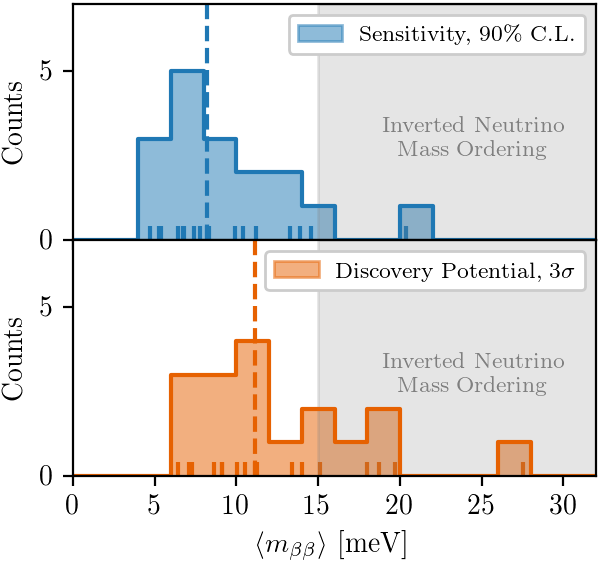

In [5]:
fig, ax = plt.subplots(figsize=figsize(487.8225, 0.5, 1.5), ncols=1, nrows=2, sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)

title = ['Median Sensitivity \n at the 90% C.L.', 'Median Discovery \n Potential at $3\sigma$']
for i,t_tg in enumerate([sensitivity, discovery]): 

    ax[i].set_xlim(0,32)
    ax[i].set_ylim(0,7)
    ax[i].set_xlabel(r'$\langle m_{\beta\beta}\rangle$ [meV]')
    ax[i].set_ylabel('Counts')
    ax[i].set_xticks([0,5,10,15,20,25,30])
    ax[i].set_yticks(np.arange(0,7,5))

    hist, histbins = np.histogram(Getmbb(NME[nEXO], t_tg), bins=np.arange(0,40,2))
    ax[i].fill_between(histbins[:-1], hist, step='post', alpha=0.5, label=Labels[i], color=colors[i])
    ax[i].step(histbins[:-1], hist, where='post', color=colors[i])
    ax[i].vlines(x=np.median(Getmbb(NME[nEXO], t_tg)), ymin=0, ymax=7, ls='--', color=colors[i])
    ax[i].scatter(Getmbb(NME[nEXO], t_tg), [0]*len(NME[nEXO]), color=colors[i], s=100, marker='|')

    ax[i].fill_between(x=np.linspace(15,32,10), y1=0, y2=7, color='grey', alpha=0.2)
    ax[i].text(24.5, 3, 'Inverted Neutrino \n Mass Ordering', fontsize=8, color='grey', ha='center', va='center')

    ax[i].legend(loc='upper right', fontsize=8, framealpha=1.0)
plt.savefig('mbb_nexo.pdf')